# **YOLOTumorDetection: Fine-Tuned YOLOv8 for Brain Tumor Detection**

## **Project Overview**
YOLOTumorDetection is a deep learning project designed to detect brain tumors in MRI images using **YOLOv8**.  
The workflow included **data exploration & visualization**, **fine-tuning YOLOv8** on a labeled brain tumor dataset, and **deploying the model** as an interactive **Streamlit web app** and **Hugging Face Space** for real-time detection.


## **Objective**
Develop and deploy an advanced object detection model to automatically identify and localize tumorous regions in brain MRI scans, supporting applications in **medical image analysis**, **diagnosis assistance**, and **healthcare AI research**.


## **Modeling Approach**
- **Base Model:** YOLOv8 (Ultralytics implementation, pretrained on COCO dataset)  
- **Fine-Tuning:** Applied transfer learning on the Brain Tumor MRI dataset  
- **Prediction Outputs:** Bounding boxes around detected tumor areas with confidence scores

## **Performance**
The fine-tuned model achieved high performance on the test set:

- **Precision:** 91.16%  
- **Recall:** 96.87%  
- **mAP@50:** 96.63%  

These results demonstrate the model’s strong generalization and robust tumor detection capability, even across varied MRI conditions.

## **Deployment**
- **Streamlit App:** [YOLOTumorDetection](https://yolotumordetection-fny43wuxdseqglmbeudsrx.streamlit.app/)  
- **Hugging Face Repo:** [YOLOTumorDetection](https://huggingface.co/RawanAlwadeya/YOLOTumorDetection)

Users can upload MRI images to receive instant predictions with bounding boxes highlighting tumor areas — supporting faster and more accurate medical image interpretation.

Watch a short demo of the app here: [View on LinkedIn](https://www.linkedin.com/posts/rawan-alwadeya-17948a305_machinelearning-medicalimaging-healthcareai-activity-7381092953752186880-Ul23?utm_source=share&utm_medium=member_desktop&rcm=ACoAAE3YzG0BAZw48kimDDr_guvq8zXgSjDgk_I)

## **About YOLO Tumor Detection**

<img src="https://www.regionalcancercare.org/wp-content/uploads/2021/08/Human-brain-with-tumor-3D-illustration.jpg" width="800" height="800">

Detecting **brain tumors** accurately and efficiently is one of the most critical challenges in modern medical imaging.  
Traditional manual diagnosis can be **time-consuming** and prone to **human error**, especially when analyzing complex MRI and CT scans.  

This project leverages **YOLOv8**, a state-of-the-art **object detection model**, fine-tuned specifically to detect and localize **tumorous regions** in brain scans.  
The app automatically highlights potential tumor areas with **bounding boxes**, providing valuable support for **radiologists, researchers, and AI-driven healthcare systems**.

### **Key Benefits**
- **Early detection support** through automated tumor localization  
- **Enhanced diagnostic accuracy** with visual detection and confidence scores  
- **Time efficiency** by reducing manual image analysis effort  
- **AI-assisted medical imaging** for educational and research applications  

### **Applications**
- **Medical imaging research and education**  
- **AI-based diagnostic support systems**  
- **Radiology automation and visualization tools**  
- **Healthcare AI innovation and model deployment**  

By combining the power of **computer vision** and **deep learning**, this project demonstrates how **YOLOv8** can contribute to **early diagnosis**, **precision medicine**, and the **advancement of intelligent healthcare solutions**.

#### **Environment Setup & Requirements Installation**

In [1]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigque

#### **Import Necessary Libraries**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import hashlib
import random
import glob
from roboflow import Roboflow
import collections
import cv2
import yaml
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
from huggingface_hub import login
from huggingface_hub import HfApi
from huggingface_hub import hf_hub_download

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#### **Dataset Loading**

In [3]:
rf = Roboflow(api_key="")
project = rf.workspace("projects-es9pa").project("brain-tumor-diagnosis-with-ai-kprm4-5yspu")
version = project.version(1)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brain-tumor-diagnosis-with-AI-1 in yolov8:: 100%|██████████| 510/510 [00:00<00:00, 11480.08it/s]


### **Data Exploration and Visualization**

In [4]:
with open("/kaggle/working/Brain-tumor-diagnosis-with-AI-1/data.yaml") as f:
    data_yaml = yaml.safe_load(f)

print("Number of classes:", data_yaml["nc"])
print("Class names:", data_yaml["names"])

Number of classes: 1
Class names: ['TOMUR']


train: 174 images
valid: 50 images
test: 25 images


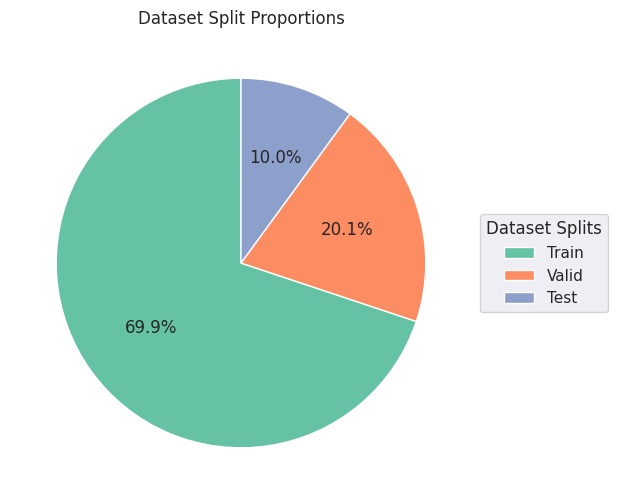

In [5]:
dataset_dir = "Brain-tumor-diagnosis-with-AI-1"

split_counts = {}
for split in ["train", "valid", "test"]:
    images = glob.glob(f"/kaggle/working/{dataset_dir}/{split}/images/*.jpg")
    split_counts[split.capitalize()] = len(images)
    print(f"{split}: {len(images)} images")

labels = list(split_counts.keys())
sizes = list(split_counts.values())
colors = plt.cm.Set2.colors[:len(labels)]

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes, autopct='%1.1f%%', startangle=90, colors=colors
)

plt.legend(
    wedges, labels, title="Dataset Splits", 
    loc="center left", bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Dataset Split Proportions")
plt.show()

In [9]:
with open(f"/kaggle/working/{dataset_dir}/data.yaml") as f:
    data_yaml = yaml.safe_load(f)

class_names = data_yaml["names"]

def count_classes(label_dir):
    counts = collections.Counter()
    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            with open(os.path.join(label_dir, file)) as f:
                for line in f:
                    cls_id = int(line.split()[0])  
                    counts[class_names[cls_id]] += 1
    return counts

for split in ["train", "valid", "test"]:
    label_dir = f"/kaggle/working/{dataset_dir}/{split}/labels"
    print(split, count_classes(label_dir))

train Counter({'TOMUR': 108})
valid Counter({'TOMUR': 32})
test Counter({'TOMUR': 17})


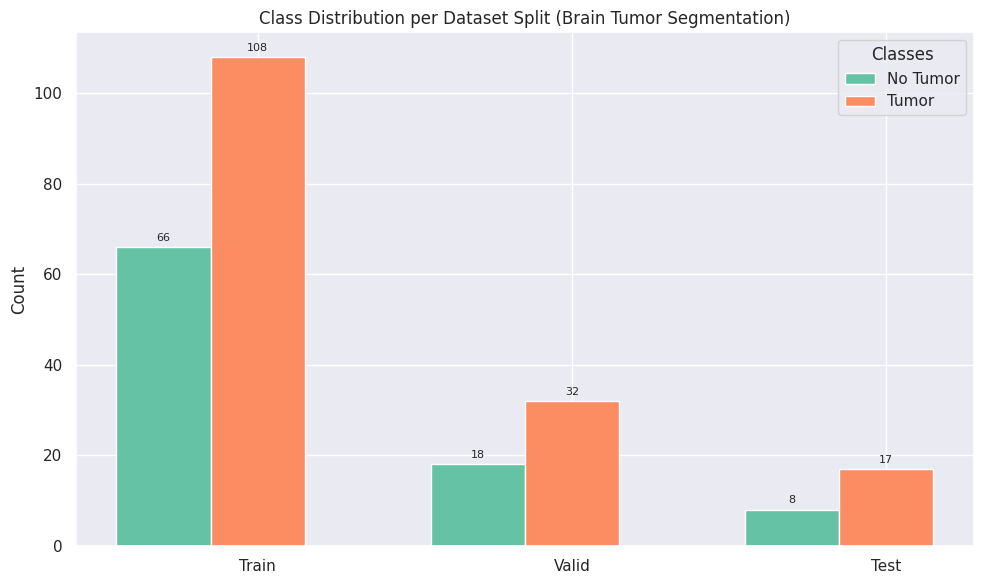

In [10]:
class_names = ['Tumor']

split_class_counts = {}
for split in ["train", "valid", "test"]:
    label_dir = f"/kaggle/working/{dataset_dir}/{split}/labels"
    split_class_counts[split] = count_classes(label_dir)

for split in split_class_counts:
    total_images = len(os.listdir(f"/kaggle/working/{dataset_dir}/{split}/images"))
    labeled_images = sum(split_class_counts[split].values())
    no_tumor_count = total_images - labeled_images
    split_class_counts[split]["No Tumor"] = no_tumor_count

all_classes = sorted(set().union(*[split_class_counts[s].keys() for s in split_class_counts]))

x = range(len(split_class_counts))  
width = 0.3  
colors = plt.cm.Set2.colors  

fig, ax = plt.subplots(figsize=(10, 6))

for i, cls in enumerate(all_classes):
    counts = [split_class_counts[s].get(cls, 0) for s in split_class_counts]
    rects = ax.bar(
        [xi + i*width - (len(all_classes)/2)*width for xi in x], 
        counts, width,
        label=cls, color=colors[i % len(colors)]
    )
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

ax.set_ylabel("Count")
ax.set_title("Class Distribution per Dataset Split (Brain Tumor Segmentation)")
ax.set_xticks(x)
ax.set_xticklabels([s.capitalize() for s in split_class_counts])
ax.legend(title="Classes")

plt.tight_layout()
plt.show()

#### **Duplicate Image Detection**

In [11]:
def file_hash(path):
    """Return MD5 hash of a file."""
    with open(path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

def check_duplicates(dataset_dir, split):
    """Check for duplicate images within a split."""
    images = glob.glob(f"/kaggle/working/{dataset_dir}/{split}/images/*.jpg")
    hashes, dupes = {}, []
    
    for img in images:
        h = file_hash(img)
        if h in hashes:
            dupes.append((img, hashes[h]))
        else:
            hashes[h] = img

    if dupes:
        print(f"⚠️ Duplicates found in {split}: {len(dupes)}")
        for d in dupes:
            print(" -", d)
    else:
        print(f"✅ No duplicates in {split} ({len(images)} images)")

for split in ["train", "valid", "test"]:
    check_duplicates("Brain-tumor-diagnosis-with-AI-1", split)

✅ No duplicates in train (174 images)
✅ No duplicates in valid (50 images)
✅ No duplicates in test (25 images)


#### **Check for Corrupted Files**

In [12]:
def check_corrupted(dataset_dir, split):
    """Check for corrupted images in a split."""
    images = glob.glob(f"/kaggle/working/{dataset_dir}/{split}/images/*.jpg")
    corrupted = []
    
    for img_path in images:
        try:
            with Image.open(img_path) as img:
                img.verify()  
        except Exception:
            corrupted.append(img_path)
    
    if corrupted:
        print(f"⚠️ Corrupted images found in {split}: {len(corrupted)}")
        for c in corrupted:
            print(" -", c)
    else:
        print(f"✅ No corrupted images in {split} ({len(images)} images)")

for split in ["train", "valid", "test"]:
    check_corrupted("Brain-tumor-diagnosis-with-AI-1", split)

✅ No corrupted images in train (174 images)
✅ No corrupted images in valid (50 images)
✅ No corrupted images in test (25 images)


#### **Visualize Sample Images**

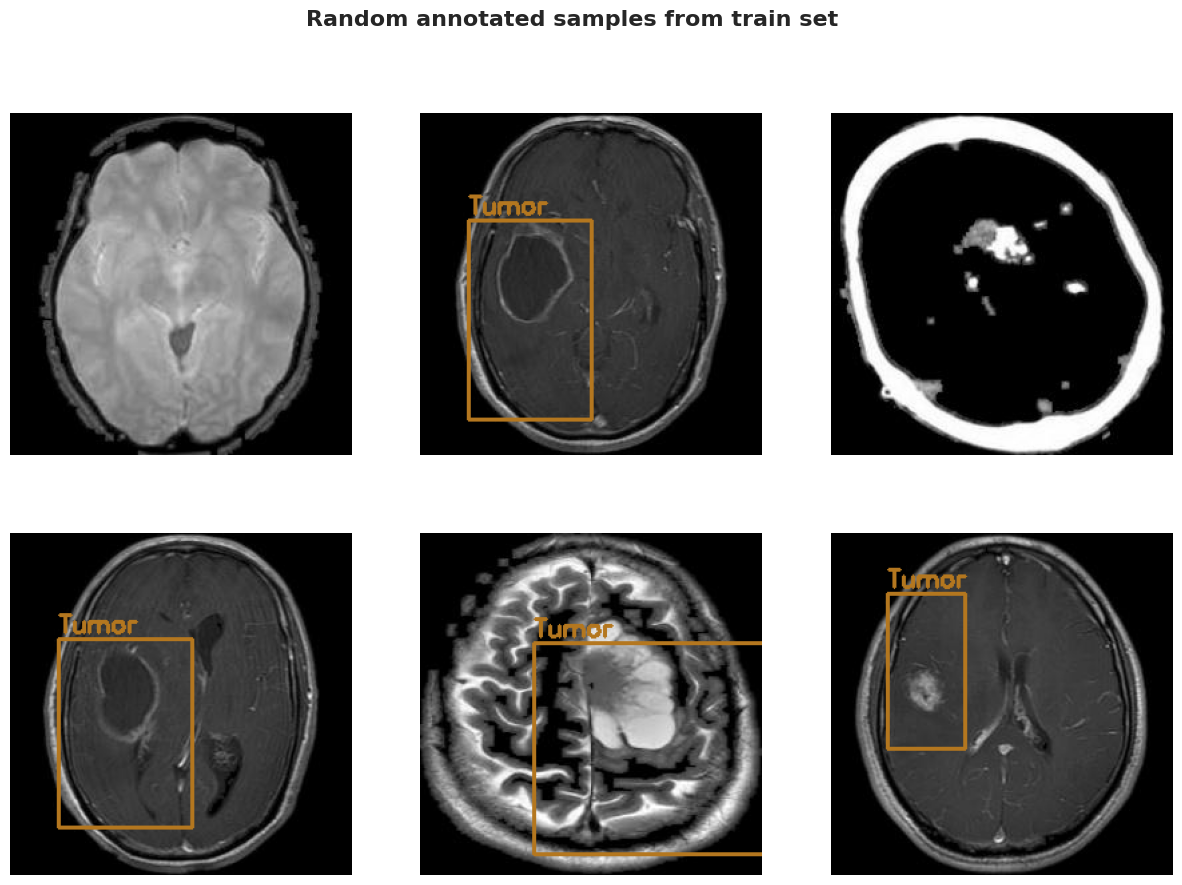

In [15]:
with open(f"/kaggle/working/{dataset_dir}/data.yaml") as f:
    data_yaml = yaml.safe_load(f)

class_names = data_yaml["names"]

visual_name_map = { "TOMUR": "Tumor" }

color_palette = plt.cm.tab10.colors  
class_colors = {cls: tuple(int(c*255) for c in color_palette[i % 10]) 
                for i, cls in enumerate(class_names)}

def plot_random_annotated_samples(dataset_dir, split="train", n_samples=6, per_row=3):
    """Show random annotated samples from YOLO dataset split with bounding boxes and labels."""
    
    image_dir = os.path.join(f"/kaggle/working/{dataset_dir}", split, "images")
    label_dir = os.path.join(f"/kaggle/working/{dataset_dir}", split, "labels")
    images = os.listdir(image_dir)
    
    random.seed()
    sample_imgs = random.sample(images, min(n_samples, len(images)))
    
    rows = (len(sample_imgs) + per_row - 1) // per_row
    fig, axes = plt.subplots(rows, per_row, figsize=(15, 5 * rows))
    axes = axes.flatten()
    
    for i, img_file in enumerate(sample_imgs):
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))
        
        img = cv2.imread(img_path)
        h, w, _ = img.shape
        
        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 5:
                        cls, x, y, bw, bh = map(float, parts[:5])
                        cls = int(cls)
                        x, y, bw, bh = x*w, y*h, bw*w, bh*h
                        x1, y1 = int(x - bw/2), int(y - bh/2)
                        x2, y2 = int(x + bw/2), int(y + bh/2)

                        cls_name = class_names[cls]
                        # Remap for visualization
                        display_name = visual_name_map.get(cls_name, cls_name)
                        color = class_colors[cls_name]
                        
                        cv2.rectangle(img, (x1,y1), (x2,y2), color, 2)
                        cv2.putText(img, display_name, (x1, max(y1-5, 15)),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
        
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].axis("off")
    
    for j in range(len(sample_imgs), len(axes)):
        axes[j].axis("off")
    
    plt.suptitle(f"Random annotated samples from {split} set", fontsize=16, fontweight="bold")
    plt.show()

plot_random_annotated_samples(dataset_dir, split="train", n_samples=6, per_row=3)

### **Training YOLOv8 for Brain Tumor Detection**

#### **About YOLOv8**
**YOLOv8 (You Only Look Once, version 8)** is a cutting-edge **object detection architecture** developed by **Ultralytics**.  
It is designed for **real-time detection** with high accuracy and efficiency, making it ideal for applications in **medical imaging**, **autonomous systems**, and **research environments**.

YOLOv8 analyzes the entire image in a **single forward pass**, predicting **bounding boxes** and **class labels** simultaneously.  
This enables the model to rapidly identify and localize **tumorous regions** in brain MRI or CT scan images within milliseconds.

#### **Why Fine-Tuning with YOLOv8?**
Training a model from scratch requires vast amounts of labeled medical data and computational power.  
Instead, this project applies **transfer learning** — fine-tuning a pretrained YOLOv8 model on a **Brain Tumor MRI dataset** — to specialize it for detecting and localizing tumor regions.

This fine-tuning approach:  
- Enables **accurate tumor detection** even with a limited dataset  
- Enhances **model generalization** across varied MRI scans and conditions  
- Reduces **training time and computational cost**  
- Maintains **high inference speed** for real-time analysis  

In this project, YOLOv8 is fine-tuned to classify and detect the presence of:  
- **Tumor** (highlighted region in the MRI)

This empowers the development of **AI-assisted medical tools** that can support **radiologists**, **researchers**, and **healthcare professionals** in **early diagnosis** and **visual interpretation** of brain scans.

In [35]:
model = YOLO("yolov8n.pt")

model.train(
    data="Brain-tumor-diagnosis-with-AI-1/data.yaml",
    epochs=150,
    imgsz=640
)

Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Brain-tumor-diagnosis-with-AI-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

invalid value encountered in less
invalid value encountered in less


                   all         50         32      0.911      0.969      0.966      0.828
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /kaggle/working/runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0d680bc950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

#### **Model Evaluation**

In [36]:
print("🔹 Model Evaluation")
test_metrics = model.val() 
print("Precision:", test_metrics.box.p)
print("Recall:", test_metrics.box.r)
print("mAP50:", test_metrics.box.map50)
print("mAP50-95:", test_metrics.box.map)

🔹 Model Evaluation
Ultralytics 8.3.204 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 340.4±32.2 MB/s, size: 8.4 KB)
val: Scanning /kaggle/working/Brain-tumor-diagnosis-with-AI-1/valid/labels.cache... 50 images, 18 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 101.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.8it/s 1.4s0.7s


invalid value encountered in less
invalid value encountered in less


                   all         50         32      0.912      0.969      0.966      0.824
Speed: 6.7ms preprocess, 5.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /kaggle/working/runs/detect/train62
Precision: [    0.91164]
Recall: [    0.96875]
mAP50: 0.966299430740038
mAP50-95: 0.8240638465707413


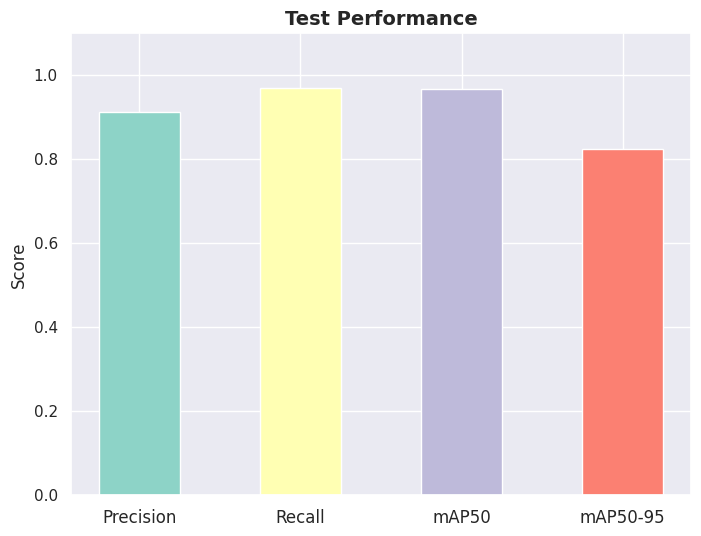

In [37]:
test_scores = {
    "Precision": test_metrics.box.p.mean(),
    "Recall": test_metrics.box.r.mean(),
    "mAP50": test_metrics.box.map50.mean(),
    "mAP50-95": test_metrics.box.map.mean()
}

labels = list(test_scores.keys())
test_values = list(test_scores.values())

x = range(len(labels))

colors = plt.cm.Set3(range(len(labels)))

plt.figure(figsize=(8,6))
plt.bar(x, test_values, color=colors, width=0.5)

plt.xticks(x, labels, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1.1)
plt.title("Test Performance", fontsize=14, fontweight="bold")

plt.show()


image 1/1 /kaggle/working/Brain-tumor-diagnosis-with-AI-1/test/images/M_333_jpg.rf.ea5ddbaa9244022b8f59692893f2558e.jpg: 640x640 1 TOMUR, 8.1ms
Speed: 3.1ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


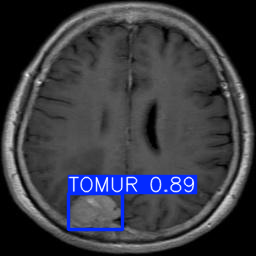

Image: M_333_jpg.rf.ea5ddbaa9244022b8f59692893f2558e.jpg
⚠️ Tumor detected


In [38]:

test_dir = f"/kaggle/working/{dataset_dir}/test/images"

random.seed()
sample_imgs = random.sample(
    [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith((".jpg", ".png"))],
    1
)

custom_names = {0: "Tumor"}

for img_path in sample_imgs:
    results = model.predict(img_path, conf=0.25, imgsz=640)

    results[0].show()

    pred_classes = results[0].boxes.cls.cpu().numpy().astype(int)
    detected = len(pred_classes) > 0

    print(f"Image: {os.path.basename(img_path)}")
    if detected:
        print("⚠️ Tumor detected")
    else:
        print("✅ No tumor detected")

#### **Authenticate with Hugging Face Hub**

In [ ]:
load_dotenv()
token = os.getenv("HUGGINGFACE_TOKEN")

login(token=token)

In [49]:
save_path = "/kaggle/working/YOLOTumorDetection.pt"
model.save(save_path)

print(f"✅ Model saved at: {save_path}")

✅ Model saved at: /kaggle/working/YOLOTumorDetection.pt


#### **Deploy model to Hugging Face Hub**

In [50]:
api = HfApi()
repo_id = "RawanAlwadeya/YOLOTumorDetection"

api.create_repo(repo_id=repo_id, repo_type="model", private=False, exist_ok=True)
print(f"✅ Repo created: https://huggingface.co/{repo_id}")

local_model_path = save_path

api.upload_file(
    path_or_fileobj=local_model_path,
    path_in_repo="YOLOTumorDetection.pt",  
    repo_id=repo_id,
    repo_type="model"
)

print(f"✅ Model uploaded to: https://huggingface.co/{repo_id}/blob/main/YOLOTumorDetection.pt")

✅ Repo created: https://huggingface.co/RawanAlwadeya/YOLOTumorDetection


Uploading...:   0%|          | 0.00/6.17M [00:00<?, ?B/s]

✅ Model uploaded to: https://huggingface.co/RawanAlwadeya/YOLOTumorDetection/blob/main/YOLOTumorDetection.pt


#### **Load and Test Model from Hugging Face Hub**

In [9]:
model_path = hf_hub_download(
    repo_id="RawanAlwadeya/YOLOTumorDetection", 
    filename="YOLOTumorDetection.pt"
)

model = YOLO(model_path)

print("✅ Model loaded from Hugging Face:", model_path)

✅ Model loaded from Hugging Face: C:\Users\OMEN\.cache\huggingface\hub\models--RawanAlwadeya--YOLOTumorDetection\snapshots\6ad459b9944849727290faa3f13d77f40cd9cb60\YOLOTumorDetection.pt


In [12]:
def detect_tumor(model, img_path, conf=0.25, imgsz=640):
    """
    Detect tumor in a given image using YOLO model.
    Displays the image with bounding boxes and prints whether a tumor is detected.
    """

    results = model.predict(img_path, conf=conf, imgsz=imgsz, verbose=False)

    img_bgr = results[0].plot()  
    img_rgb = img_bgr[:, :, ::-1]  

    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Tumor Detection Result")
    plt.show()


    pred_classes = results[0].boxes.cls.cpu().numpy().astype(int)
    names = model.names  

    detected = len(pred_classes) > 0

    if detected:
        print("⚠️ Tumor detected")
    else:
        print("✅ No tumor detected")

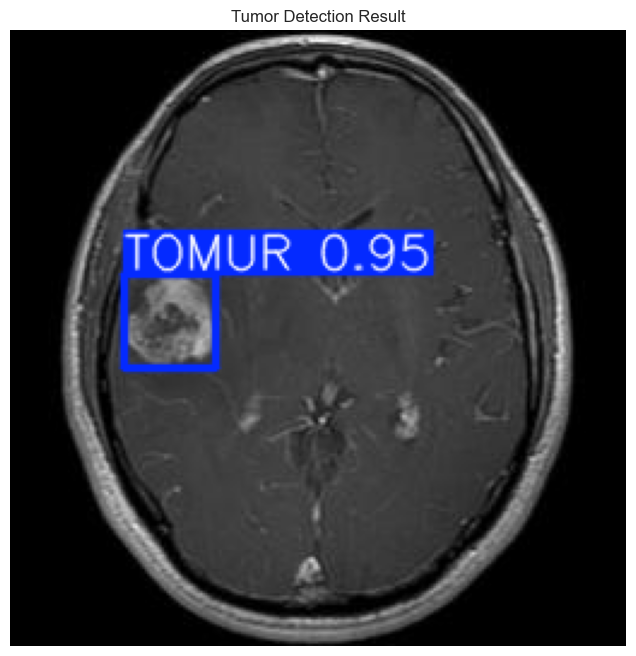

⚠️ Tumor detected


In [13]:
detect_tumor(model, "test.jpg")

## **Final Thoughts**

This project highlights the potential of **YOLOv8** in advancing **medical image analysis**, specifically in detecting and localizing **brain tumors** from MRI scans with high precision.  
Through **transfer learning** and careful fine-tuning on a specialized medical dataset, the model achieved strong performance across all key metrics — with high **precision (91.16%)**, **recall (96.87%)**, and **mAP@50 (96.63%)** — demonstrating its ability to generalize effectively across diverse brain imaging conditions.

The workflow combined **data preprocessing**, **visual exploration**, and **model optimization**, ensuring accurate and consistent tumor localization even in challenging MRI scenarios.  
By integrating the model into an interactive **Streamlit application** and **Hugging Face Space**, this project bridges the gap between **AI research** and **practical usability**, allowing users to visualize real-time predictions with intuitive bounding box annotations.

Such deep learning–based approaches can support **radiologists and healthcare professionals** by providing rapid, assistive insights — enabling earlier detection and improved interpretation of brain abnormalities.  
Ultimately, **YOLOTumorDetection** demonstrates how **AI and computer vision** can contribute to more accessible, efficient, and intelligent **healthcare solutions**.

---

**Thank you for exploring the YOLOTumorDetection project.**